### Aprendizaje Bayesiano


El Aprendizaje Bayesiano es una aproximación al aprendizaje automático (machine learning) y la estadística que se basa en el teorema de Bayes. Es una forma de modelar la incertidumbre y actualizar nuestras creencias sobre un evento o un conjunto de datos a medida que adquirimos nueva información

Queremos aproximar la distribución de un parámetro de una distribución. 
El parámetro más probable coincide con el de máxima likelihood, que solo nos da un número a diferencia de este método que nos da como resultado una gaussiana (ya que asumimos que $\mu$ es normal).


In [741]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import matplotlib.patches as mpatches

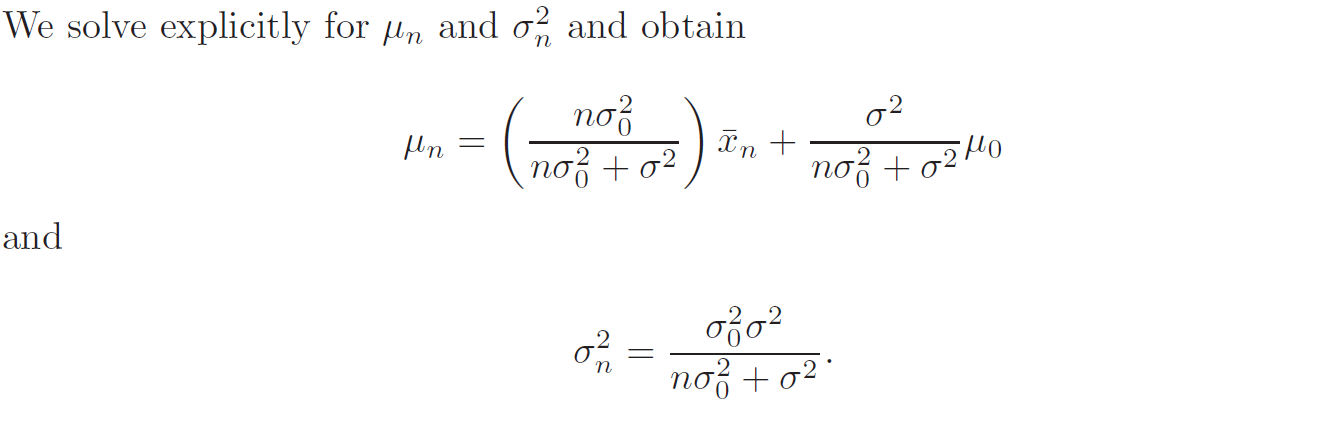

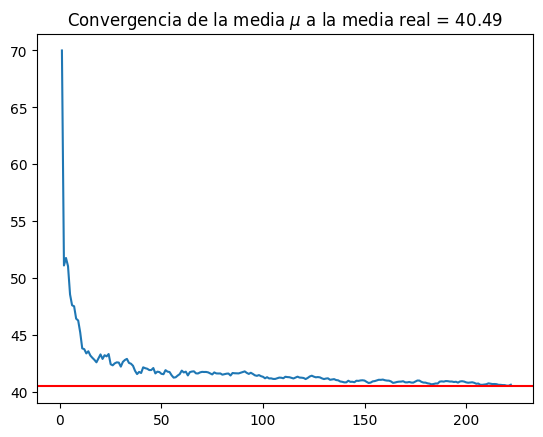

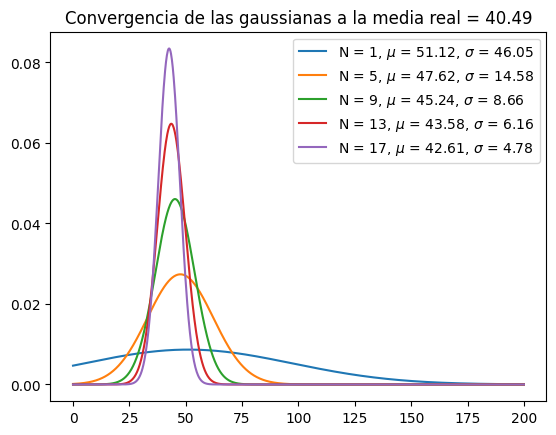

In [742]:
def bayesianLearning(samples, sigma0, mu0) -> tuple:
    """
    Función que realiza el aprendizaje bayesiano de un conjunto de datos de manera iterativa
    :param samples: Conjunto de datos
    :param sigma0: Varianza inicial
    :return: Tupla con la media y la varianza
    """
    #mezclar los datos en pandas
    samples = np.random.permutation(samples)
    sigma = np.std(samples)
    sigmas = [sigma0]
    means = [mean0]

    for i in range(1, len(samples)):
        meanN = ((sigma0**2 * i) / (i*sigma0**2 + sigma**2))*np.mean(samples[:i]) + ((sigma**2) / (i*sigma0**2 + sigma**2))*mu0
        sigmaN = ((sigma0**2) * (sigma**2)) / (i*(sigma0**2) + (sigma**2))
        means.append(meanN)
        sigmas.append(sigmaN)
    
    return means, sigmas


# Leer el archivo CSV
data = pd.read_csv('datasetHojas.csv', sep=',')
data_clase1 = data[data['Clase'] == 1]
data_clase2 = data[data['Clase'] == 2]

# Separar los datos de cada clase
largo_clase1 = data_clase1['Largo']
ancho_clase1 = data_clase1['Ancho']
largo_clase2 = data_clase2['Largo']
ancho_clase2 = data_clase2['Ancho']

data = largo_clase2.to_numpy()
# Realizar el aprendizaje bayesiano
mean0 = 70
sigma0 = 10
means, sigmas = bayesianLearning(data, sigma0, mean0)

# Graficar los resultados
Ns = np.arange(1, len(data)+1)
plt.plot(Ns, means, label='Media')
plt.axline((0, np.mean(data)), slope=0, color='r', label='Media real')
plt.title(f'Convergencia de la media $\mu$ a la media real = {np.mean(data):.2f}')
plt.show()

Ns = np.arange(1, 20, 4)
# Ns = np.append(Ns, len(data)-1)
#plot de las gaussianas con means y sigmas
for i in Ns:
    x = np.linspace(0, 200, 1000)
    y = st.norm.pdf(x, loc=means[i], scale=sigmas[i])
    plt.plot(x, y, label='N = {}, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(i, means[i], sigmas[i]))
plt.legend()
plt.title('Convergencia de las gaussianas a la media real = {:.2f}'.format(np.mean(data)))
plt.show()

    
        


    


### Caso multivariable

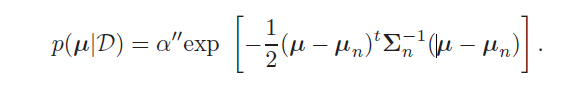

La iteración resulta:

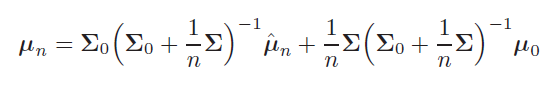

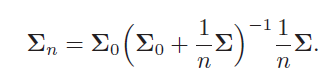

El $\Sigma_0$ puede ser una matriz diagonal de unos, una identidad. $\hat\mu_n$ es la media hasta la muestra n y $\mu_0$ se propone. $\Sigma_n$ debería ir achicandose a medida que iteramos. 

Tomamos el largo de la clase 1 contra el largo de la clase 2, y luego lo mismo con la clase 2.

Tomamos el 70% de los datos para entrenar y el 30% para testear. Sampleamos random en cada caso.

In [743]:
def multivariableBayesianLearning(Samples, Sigma0, Mu0):
    """
    Función que realiza el aprendizaje bayesiano (train) de un conjunto de datos de manera iterativa
    :param samples: Conjunto de datos (matriz de nxN, siendo n la cantidad de clases)
    :param sigma0: Varianza inicial (matriz de nxn)
    :return: Tupla con la media y la varianza
    """
    Samples = Samples[:, np.random.permutation(Samples.shape[1])]
    train = Samples
    muN = Mu0
    muNs = [Mu0]
    SigmaNs = [Sigma0]
    for n in range(1, train.shape[1]):
        Sigma = np.cov(train[:, :])
        muNhat = np.mean(train[:, :n], axis=1)
        muN = Sigma0 @ np.linalg.inv(Sigma0 + ((1/n) * Sigma)) @ muNhat + (((1/n) * Sigma) @ np.linalg.inv(Sigma0 + ((1/n) * Sigma)) @ Mu0)
        SigmaN = Sigma0 @ np.linalg.inv((Sigma0 + ((1/n) * Sigma))) @ (Sigma * (1/n))
        muNs.append(muN)
        SigmaNs.append(SigmaN)
    return np.array(muNs), np.array(SigmaNs)


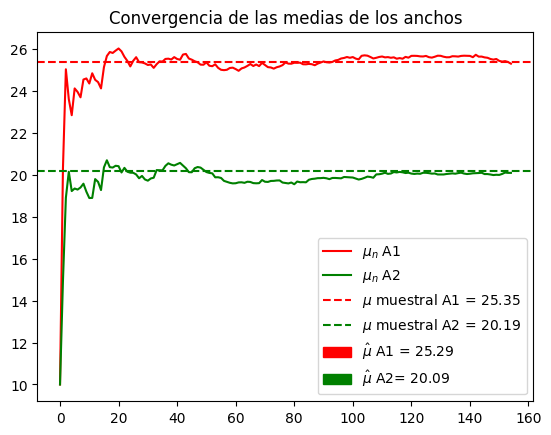

In [744]:

ancho_clase1 = np.random.permutation(ancho_clase1)
ancho_clase2 = np.random.permutation(ancho_clase2)
ancho_clase1 = ancho_clase1[:len(ancho_clase2)]

per = 0.7
ancho_clase1_train = ancho_clase1[:int(len(ancho_clase1)*per)]
ancho_clase2_train = ancho_clase2[:int(len(ancho_clase2)*per)]

ancho_clase1_test = ancho_clase1[int(len(ancho_clase1)*per):]
ancho_clase2_test = ancho_clase2[int(len(ancho_clase2)*per):]

matrix = np.array([ancho_clase1_train, ancho_clase2_train])
id = np.identity(np.shape(matrix)[0])

Sigma0 = 50 * id
Mu0 = np.array([10, 10])

multiA = multivariableBayesianLearning(matrix, Sigma0, Mu0)

A1Convergence = multiA[0][:, 0]
A2Convergence = multiA[0][:, 1]

plt.plot(A1Convergence, label=f'$\mu_n$ A1', color='r')
plt.plot(A2Convergence, label='$\mu_n$ A2', color='g')
plt.axhline(np.mean(ancho_clase1_train), color='r', label='$\mu$ muestral A1 = {:.2f}'.format(np.mean(ancho_clase1_train)), linestyle='--')
plt.axhline(np.mean(ancho_clase2_train), color='g', label='$\mu$ muestral A2 = {:.2f}'.format(np.mean(ancho_clase2_train)), linestyle='--')
plt.title('Convergencia de las medias de los anchos')
handles, labels = plt.gca().get_legend_handles_labels()

# create manual symbols for legend
patch = mpatches.Patch(color='r', label=f'$\hat\mu$ A1 = {multiA[0][-1, 0]:.2f}')
patch2 = mpatches.Patch(color='g', label=f'$\hat\mu$ A2= {multiA[0][-1, 1]:.2f}')

# add manual symbols to auto legend
handles.extend([patch, patch2])

plt.legend(handles=handles)
plt.show()



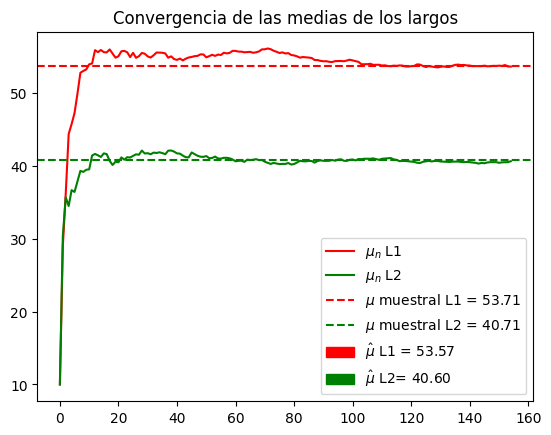

In [745]:
largo_clase1 = np.random.permutation(largo_clase1)
largo_clase2 = np.random.permutation(largo_clase2)
largo_clase1 = largo_clase1[:len(largo_clase2)]

per = 0.7
largo_clase1_train = largo_clase1[:int(len(largo_clase1)*per)]
largo_clase2_train = largo_clase2[:int(len(largo_clase2)*per)]

largo_clase1_test = largo_clase1[int(len(largo_clase1)*per):]
largo_clase2_test = largo_clase2[int(len(largo_clase2)*per):]

matrix = np.array([largo_clase1_train, largo_clase2_train])

Sigma0 = 100 * id
Mu0 = np.array([10, 10])

multiL = multivariableBayesianLearning(matrix, Sigma0, Mu0)
L1Convergence = multiL[0][:, 0]
L2Convergence = multiL[0][:, 1]


plt.plot(L1Convergence, label=f'$\mu_n$ L1', color='r')
plt.plot(L2Convergence, label='$\mu_n$ L2', color='g')
plt.axhline(np.mean(largo_clase1_train), color='r', label='$\mu$ muestral L1 = {:.2f}'.format(np.mean(largo_clase1_train)), linestyle='--')
plt.axhline(np.mean(largo_clase2_train), color='g', label='$\mu$ muestral L2 = {:.2f}'.format(np.mean(largo_clase2_train)), linestyle='--')
plt.title('Convergencia de las medias de los largos')
handles, labels = plt.gca().get_legend_handles_labels()
patch = mpatches.Patch(color='r', label=f'$\hat\mu$ L1 = {multiL[0][-1, 0]:.2f}')
patch2 = mpatches.Patch(color='g', label=f'$\hat\mu$ L2= {multiL[0][-1, 1]:.2f}')
handles.extend([patch, patch2])
plt.legend(handles=handles)
plt.show()

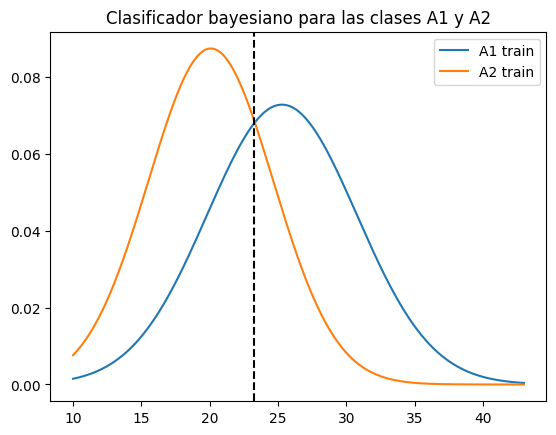

Clasificador bayesiano para las clase A1
Performance: 0.6417910447761194
Clasificador bayesiano para las clase A2
Performance: 0.8955223880597015


(60, 7)

In [746]:
#Armamos el clasificador bayesiano para las clases A1 y A2
A1BayesMean = multiA[0][-1, 0]
A1BayesSigma = ancho_clase1_train.std()
A2BayesMean = multiA[0][-1, 1]
A2BayesSigma = ancho_clase2_train.std()

#plot de las gaussianas con means y sigmas
min_lim = min(np.min(ancho_clase1_train), np.min(ancho_clase2_train))
max_lim = max(np.max(ancho_clase1_train), np.max(ancho_clase2_train))
x = np.linspace(min_lim, max_lim, 1000)
ya1 = st.norm.pdf(x, loc=A1BayesMean, scale=A1BayesSigma)
plt.plot(x, ya1, label='A1 train')
ya2 = st.norm.pdf(x, loc=A2BayesMean, scale=A2BayesSigma)
plt.plot(x, ya2, label='A2 train')
plt.legend()
plt.title('Clasificador bayesiano para las clases A1 y A2')

#find intersection
idx = np.argwhere(np.diff(np.sign(ya1 - ya2))).flatten()
value = x[idx]
plt.axvline(x[idx], color='k', linestyle='--')
plt.show()

def binary_clasificator(test, value, max_limit, clase):
    """
    Función que clasifica los datos de test en dos clases
    :param test: Conjunto de datos de test
    :param value: Valor de corte
    :return: Tupla con la cantidad de datos clasificados correctamente y la cantidad de datos clasificados incorrectamente
    """
    correct = 0
    incorrect = 0
    for i in range(len(test)):
        if max_limit:
            if test[i] <= value:
                correct += 1
            else:
                incorrect += 1
        else:
            if test[i] >= value:
                correct += 1
            else:
                incorrect += 1
    print(f'Clasificador bayesiano para las clase {clase}')
    performance = correct/(correct+incorrect)
    print(f'Performance: {performance}')
    return correct, incorrect

binary_clasificator(ancho_clase1_test, value, False, 'A1')
binary_clasificator(ancho_clase2_test, value, True, 'A2')

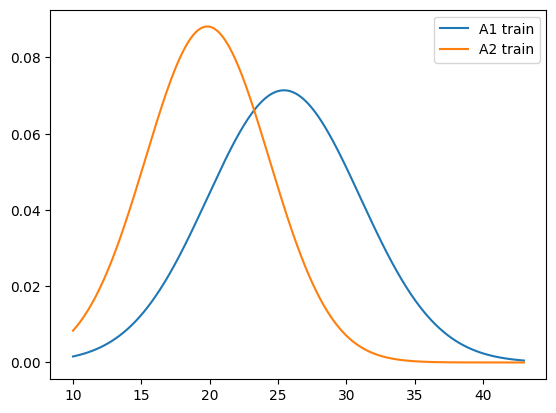

Performance: 0.7089552238805971


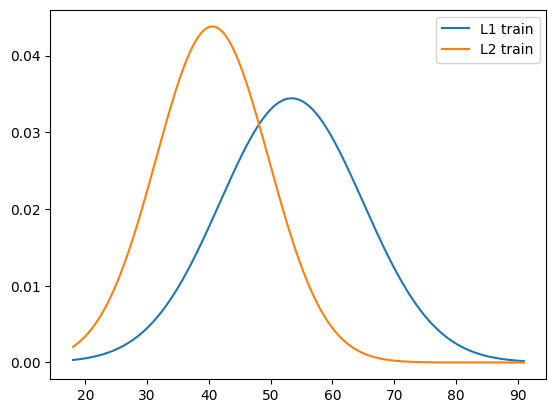

Performance: 0.7985074626865671


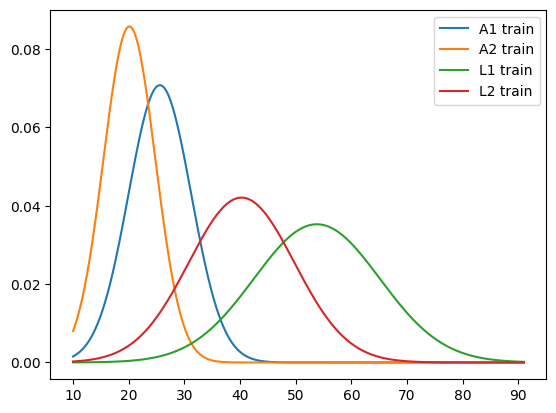

Performance: 0.6567164179104478


In [747]:
def BayesianLearningTestAndTrain(Samples, Sigma0, Mu0, train_percentage, clases, plots=True):
    """
    Función que realiza el aprendizaje bayesiano (train) de un conjunto de datos de manera iterativa
    :param samples: Conjunto de datos (matriz de nxN, siendo n la cantidad de clases)
    :param sigma0: Varianza inicial (matriz de nxn)
    :return: Tupla con la media y la varianza
    """
    Samples = Samples[:, np.random.permutation(Samples.shape[1])]
    train = Samples[:, :int(Samples.shape[1]*train_percentage)]
    test = Samples[:, int(Samples.shape[1]*train_percentage):]

    muN = Mu0
    muNs = [Mu0]
    SigmaNs = [Sigma0]
    for n in range(1, train.shape[1]):
        Sigma = np.cov(train[:, :])
        muNhat = np.mean(train[:, :n], axis=1)
        muN = Sigma0 @ np.linalg.inv(Sigma0 + ((1/n) * Sigma)) @ muNhat + (((1/n) * Sigma) @ np.linalg.inv(Sigma0 + ((1/n) * Sigma)) @ Mu0)
        SigmaN = Sigma0 @ np.linalg.inv((Sigma0 + ((1/n) * Sigma))) @ (Sigma * (1/n))
        muNs.append(muN)
        SigmaNs.append(SigmaN)

    #obtenemos los mu finales
    FinalMu = muNs[-1]
    #sacamos los sigmas del set de train 
    TrainSigma = [train[i,:].std() for i in range(train.shape[0])]

    #creamos las gaussianas correspondientes a cada clase (asumimos que nuestras muestras son normales)
    min_lim = min(np.min(train), np.min(test))
    max_lim = max(np.max(train), np.max(test))
    num = 1000
    x = np.linspace(min_lim, max_lim, num)
    gaussians = []
    for i in range(len(FinalMu)):
        gaussians.append(st.norm.pdf(x, loc=FinalMu[i], scale=TrainSigma[i]))

    if plots:
        for i in range(len(gaussians)):
            plt.plot(x, gaussians[i], label=clases[i] + ' train')
        plt.legend()
        plt.show()
    
    #evaluamos performance.
    #creamos un tensor de #Clases x #muestras x #Probabilidad de pertenecer a cada clase
    probabilities = np.zeros((test.shape[0], test.shape[1], test.shape[0])) 
    for i in range(probabilities.shape[0]):
        for j in range(probabilities.shape[1]):
            for k in range(probabilities.shape[2]):
                index = int((test[i, j] - min_lim) * (num - 1) / (max_lim - min_lim))
                probabilities[i, j, k] = gaussians[k][index]

    correct = 0
    incorrect = 0
    #vemos a que clase pertenece
    for i in range(probabilities.shape[0]):
        for j in range(probabilities.shape[1]):
            if np.argmax(probabilities[i, j, :]) == i:
                correct += 1
            else:
                incorrect += 1
    return correct, incorrect


matrix = np.array([ancho_clase1, ancho_clase2])
clase = ['A1', 'A2']
Sigma0 = 50 * id
Mu0 = 10 * np.ones((matrix.shape[0]))
train_percentage = 0.7
correct, incorrect = BayesianLearningTestAndTrain(matrix, Sigma0, Mu0, train_percentage, clase)
print(f'Performance: {correct/(correct+incorrect)}')

matrix = np.array([largo_clase1, largo_clase2])
clase = ['L1', 'L2']
Sigma0 = 50 * id
Mu0 = 10 * np.ones((matrix.shape[0]))
train_percentage = 0.7
correct, incorrect = BayesianLearningTestAndTrain(matrix, Sigma0, Mu0, train_percentage, clase)
print(f'Performance: {correct/(correct+incorrect)}')


matrix = np.array([ancho_clase1, ancho_clase2, largo_clase1, largo_clase2])
clase = ['A1', 'A2', 'L1', 'L2']
Sigma0 = 50 * np.identity(np.shape(matrix)[0])
Mu0 = 10 * np.ones((matrix.shape[0]))
train_percentage = 0.7
correct, incorrect = BayesianLearningTestAndTrain(matrix, Sigma0, Mu0, train_percentage, clase)
print(f'Performance: {correct/(correct+incorrect)}')

#### BOOTSTRAPPING

In [753]:
#Realizamos el clasificador bayesiano para las clases L1 y L2 100 veces y tomamos un promedio de la performance
def boststrapping( Samples, Sigma0, Mu0, train_percentage, clases, iterations):
    performance = []
    for i in range(iterations):
        correct, incorrect = BayesianLearningTestAndTrain(Samples, Sigma0, Mu0, train_percentage, clases, False)
        performance.append(correct/(correct+incorrect))
    return np.mean(performance), np.std(performance)

matrix = np.array([largo_clase1, largo_clase2])
clase = ['L1', 'L2']
Sigma0 = 50 * id
Mu0 = 10 * np.ones((matrix.shape[0]))
train_percentage = 0.7
iterations = 100
mean, std = boststrapping(matrix, Sigma0, Mu0, train_percentage, clase, iterations)
print(f'Performance: {mean} +- {std}')


Performance: 0.7649999999999999 +- 0.030524030171496814


### BATCH LEARNING

In [754]:
def batchBayesianLearning(Samples, Sigma0, Mu0, train_percentage, clases, batches):
    #mezclamos los datos
    Samples = Samples[:, np.random.permutation(Samples.shape[1])]
    #creamos un vector de batches 
    batches = np.array_split(Samples, batches, axis=1)
    #printear el tamaño de cada batch
    performance = []
    for i in range(len(batches)):
        correct, incorrect = BayesianLearningTestAndTrain(batches[i], Sigma0, Mu0, train_percentage, clases, False)
        performance.append(correct/(correct+incorrect))
    return np.mean(performance), np.std(performance)/np.sqrt(len(batches))

matrix = np.array([largo_clase1, largo_clase2])
clase = ['L1', 'L2']
Sigma0 = 50 * id
Mu0 = 10 * np.ones((matrix.shape[0]))
train_percentage = 0.7
batches = 10
mean, std = batchBayesianLearning(matrix, Sigma0, Mu0, train_percentage, clase, batches)
print(f'Performance: {mean} +- {std}')




Performance: 0.7428571428571429 +- 0.038065464555640645


Bootstrap0ing ste es tomar siempre un porcentaje de los datos (70% y 30% en este caso), entrenar, evaluar y calcular la desviación de esto. Es lo que tenemos que hacer en un principio. Correrlo 100 veces y ver los resultados (sacar STD y mean).
Luego tenemos que hacer k-folds y comenzar a testear entre cada lote que armamamos de muestras por ejemplo 10 bloques de 22. Buscamos la gaussiana de cada bloque con un porcentaje de ese lote y luego clasificamos con el resto de datos de ese fold (test) y sacamos la performance.

La performance se calcula 
$$ Perf = \overline X \pm \frac{\sigma}{\sqrt{CantLotes}}$$


El $\overline X$ nos dice que tan superpuestas estan las muestras, si es 0.5 se superponen y si es 1 se alejan

### Discriminante de fisher

### Funcion discriminante de la distrbución nomal

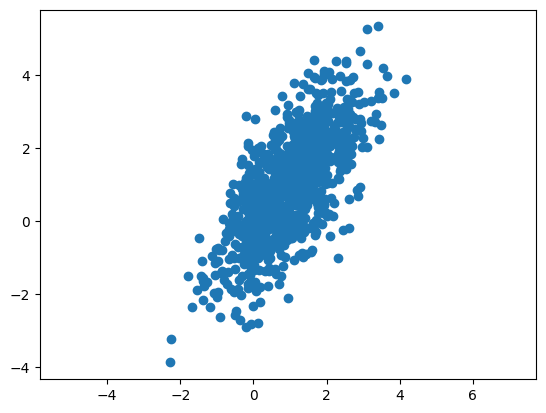

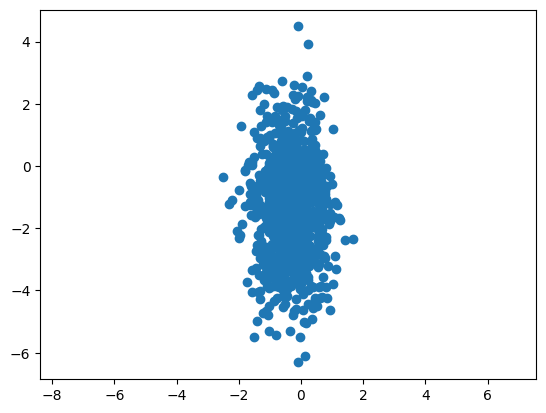

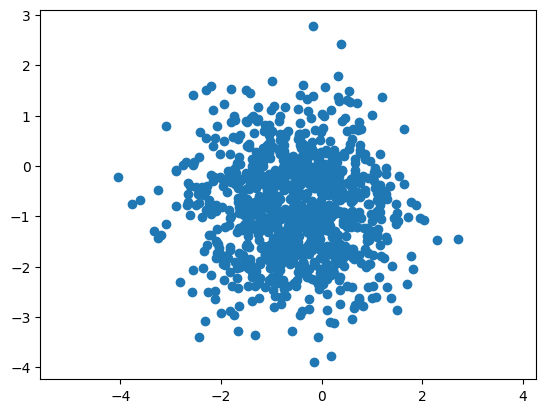

In [750]:
mean = [1, 1]
cov = [[1, 1], [1, 2]]  # diagonal covariance

multiNormal = np.random.multivariate_normal(mean, cov, 1000)

plt.scatter(multiNormal[:, 0], multiNormal[:, 1])
plt.axis('equal')
plt.show()

#proyectar los datos a un nuevo espacio
auval, auvec = np.linalg.eig(cov)

#proyectar los datos a un nuevo espacio
newSpace = auvec.T @ multiNormal.T
plt.scatter(newSpace[0, :], newSpace[1, :])
plt.axis('equal')
plt.show()

blanqueo = np.linalg.inv(np.sqrt(np.diag(auval)))

muestrasBlanqueadas = blanqueo @ auvec.T @ multiNormal.T

plt.scatter(muestrasBlanqueadas[0, :], muestrasBlanqueadas[1, :])
plt.axis('equal')
plt.show()